# Author : Nitin Sahu(Intern at The Sparks Foundation)
## Data Science and Business Analyst
### Task-3 :- As a business analyst , try to find out the weak areas where you can work to make profit.

## Step-1 :- Importing libraries

In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

##  Step-2:- importing datasets

In [4]:
df = pd.read_csv('SampleSuperstore.csv')
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


## Step-3:- Finding more Info from the datasets

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Step-4 :- Data Preparing & Cleaning

### 1- Checking for null / missing values

In [14]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### There is no missing/null values in the dataset

### 2. We check for duplicate values

In [12]:
duplicatedValues=df.duplicated()
print(duplicatedValues.sum())
df[duplicatedValues]

17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


### Observation :- There are 17 duplicate values in the dataset

### 3. Removing duplicate values

In [18]:
df.drop_duplicates(inplace=True)
duplicatedValues=df.duplicated()
print(duplicatedValues.sum())

0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 779.5+ KB


### Observation : Now there are no duplicate values and number of rows reduced to 9977.

## 4.Finding unique values

In [21]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## 5.Dropping columns

### We remove Country and Postal-code column as they are not required for further use.

In [26]:
df.drop(labels=['Country','Postal Code'],axis='columns',inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Region        9977 non-null   object 
 5   Category      9977 non-null   object 
 6   Sub-Category  9977 non-null   object 
 7   Sales         9977 non-null   float64
 8   Quantity      9977 non-null   int64  
 9   Discount      9977 non-null   float64
 10  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 662.5+ KB


### Number of column are reduced to 11.

## Step-5: Exploratory Data Analysis

### Checking Profits in different state

### 1.Checking number of states

In [30]:
n=df['State'].nunique()
print('Total numbers of States are :',n)
print(df['State'].value_counts())

Total numbers of States are : 49
California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Caro

### 2. Checking State with maximum profit.

In [32]:
#sorting states by their profits in desending order.
state_profit = df.groupby('State').sum()['Profit'].sort_values(ascending=False).reset_index()

### 3. Visualizing states having highest profit. 

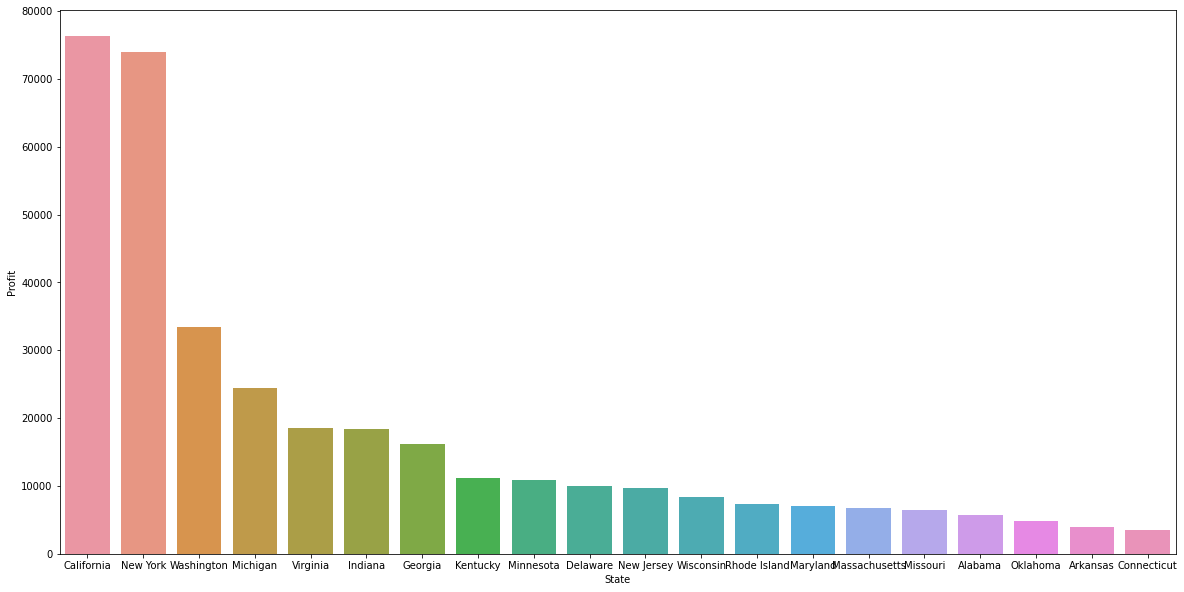

In [34]:
plt.figure(figsize=(20,10))
sb.barplot(x='State',y='Profit',data=state_profit.head(20))
plt.show()

### 4. Visualizing the state having lowest profit.

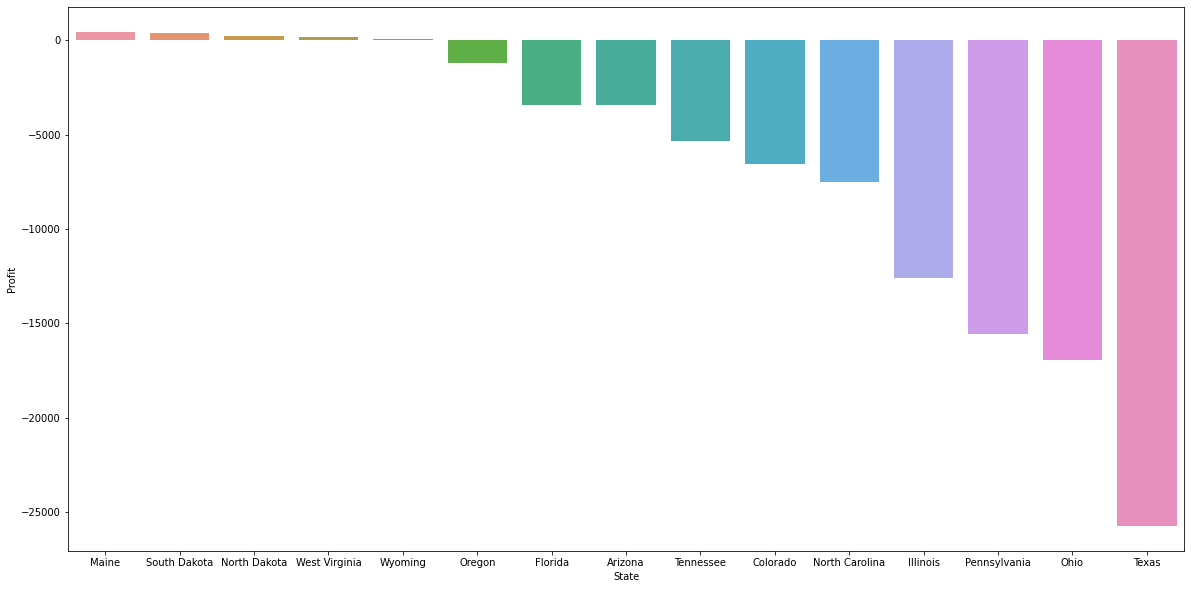

In [36]:
plt.figure(figsize=(20,10))
sb.barplot(x='State',y='Profit',data=state_profit.tail(15))
plt.show()

## Checking Profits in different cities

### 1. Checking Number of Unique cities

In [38]:
n=df['City'].nunique()
print('Total numbers of Cities are :',n)
print(df['City'].value_counts())

Total numbers of Cities are : 531
New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
                ... 
Ormond Beach       1
San Mateo          1
Palatine           1
Ontario            1
Waukesha           1
Name: City, Length: 531, dtype: int64


### 2. Checking City with Maximum profit.

In [39]:
#sorting cities by their profits in desending order.
city_profit = df.groupby('City').sum()['Profit'].sort_values(ascending=False).reset_index()

### 3. Visualizing the profit according to Cities.

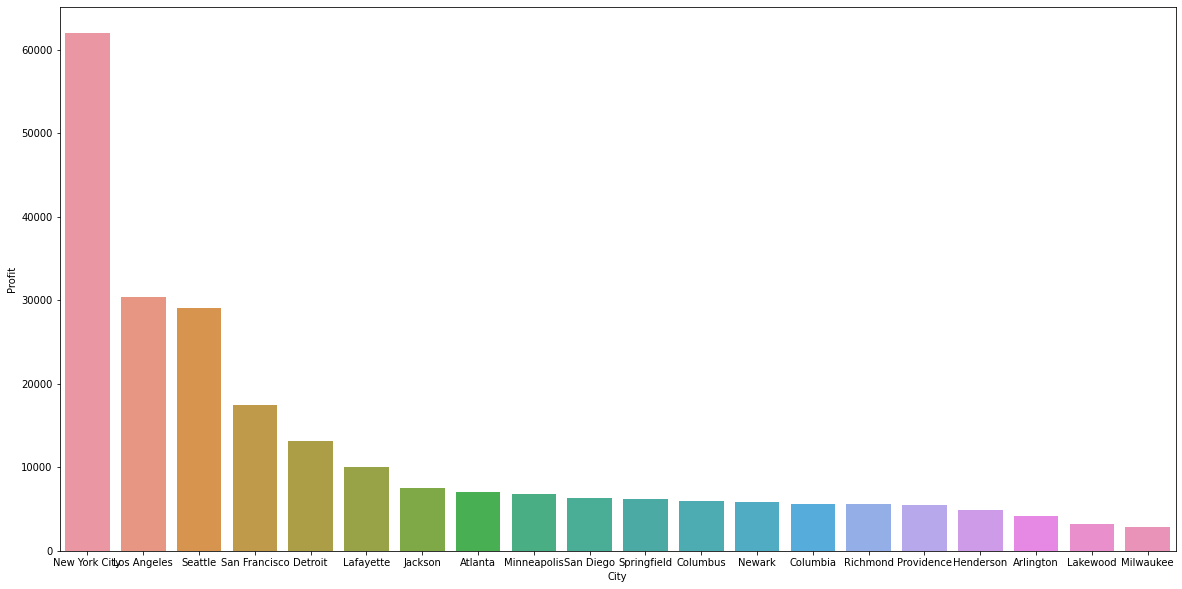

In [40]:
plt.figure(figsize=(20,10))
sb.barplot(x='City',y='Profit',data=city_profit.head(20))
plt.show()

### 4. Visualizing Cities with minimum profit.

plt.figure(figsize=(20,10))
sb.barplot(x='City',y='Profit',data=city_profit.tail(15))
plt.show()

## Checking Sales in different States

## 1. Checking States having maximum sales.

In [48]:
state_sales = df.groupby('State').sum()['Sales'].sort_values(ascending=False).reset_index()

## 2. Visualizing State having maximum sales.

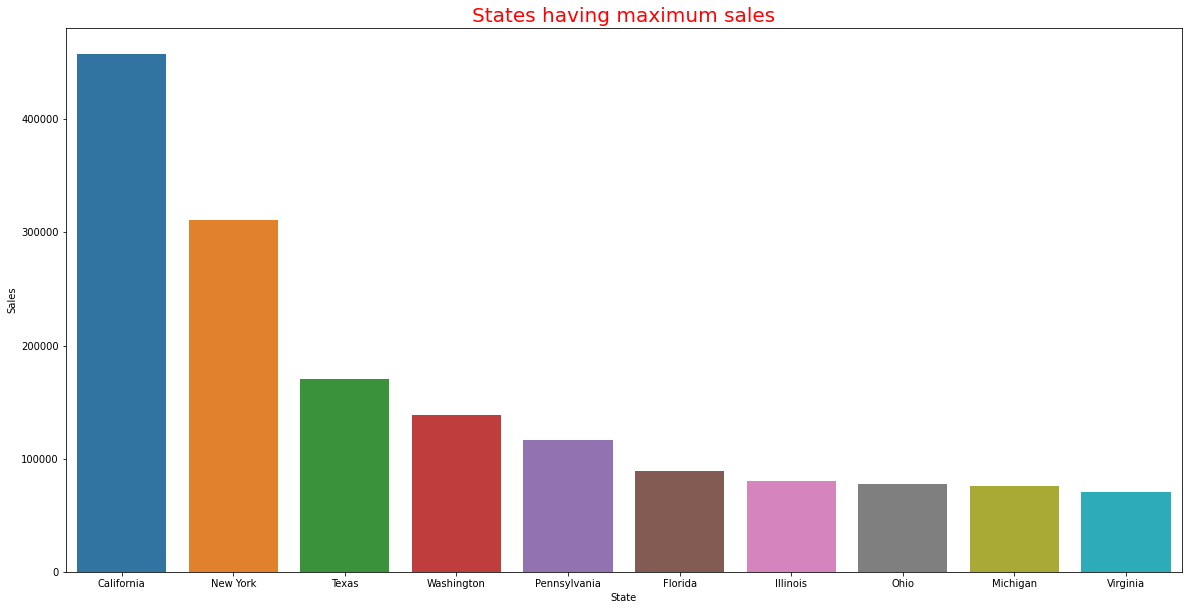

In [58]:
plt.figure(figsize=(20,10))
sb.barplot(x='State',y='Sales',data=state_sales.head(10))
plt.title('States having maximum sales',color='r',size=20)
plt.show()

## 3. Visualizing state having minimum sales.

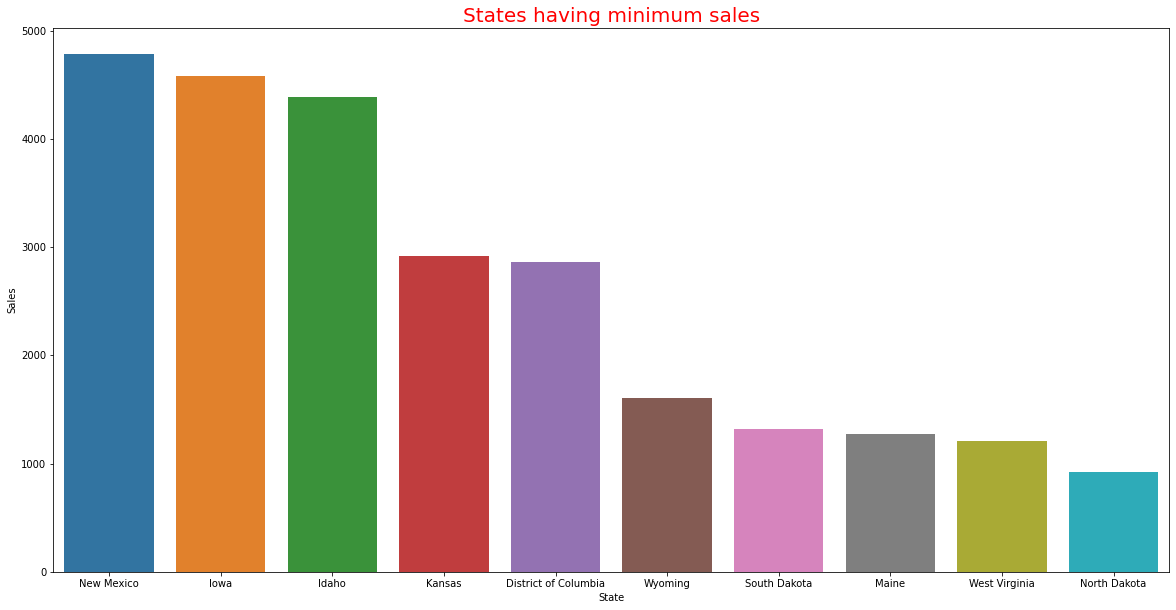

In [57]:
plt.figure(figsize=(20,10))
sb.barplot(x='State',y='Sales',data=state_sales.tail(10))
plt.title('States having minimum sales',color='r',size=20)
plt.show()

## Checking Sales in different cities.

## 1. Checking Cities having maximum sales.

In [59]:
city_sales = df.groupby('City').sum()['Sales'].sort_values(ascending=False).reset_index()

## 2. Visualizing City having highest sales.

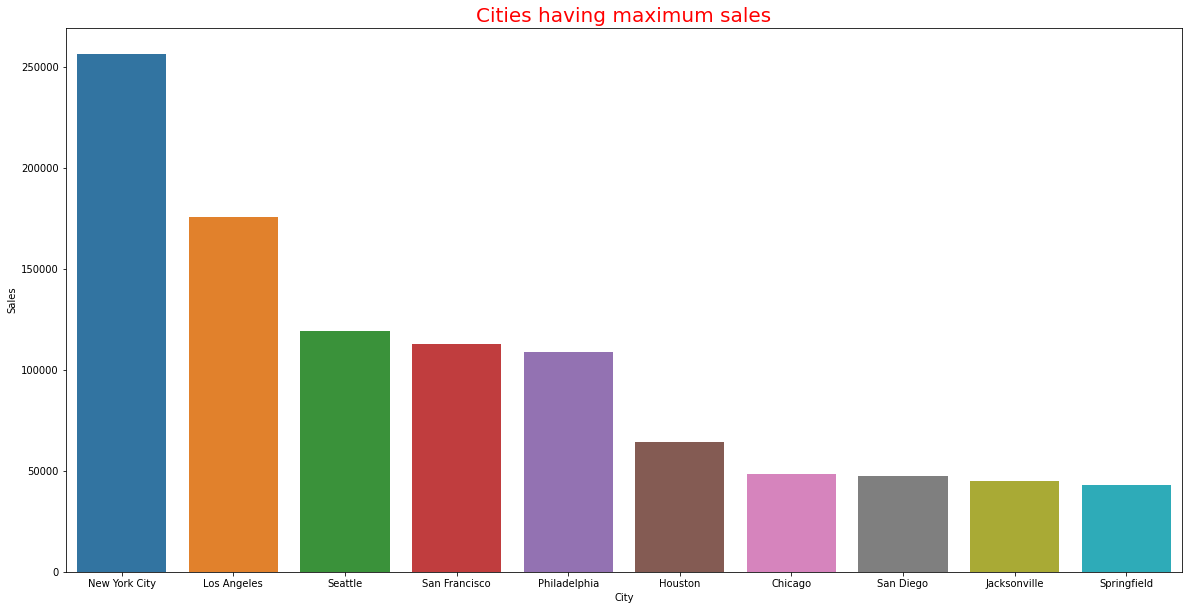

In [62]:
plt.figure(figsize=(20,10))
sb.barplot(x='City',y='Sales',data=city_sales.head(10))
plt.title('Cities having maximum sales',color='r',size=20)
plt.show()

## 3. Visualizing City having lowest sales.

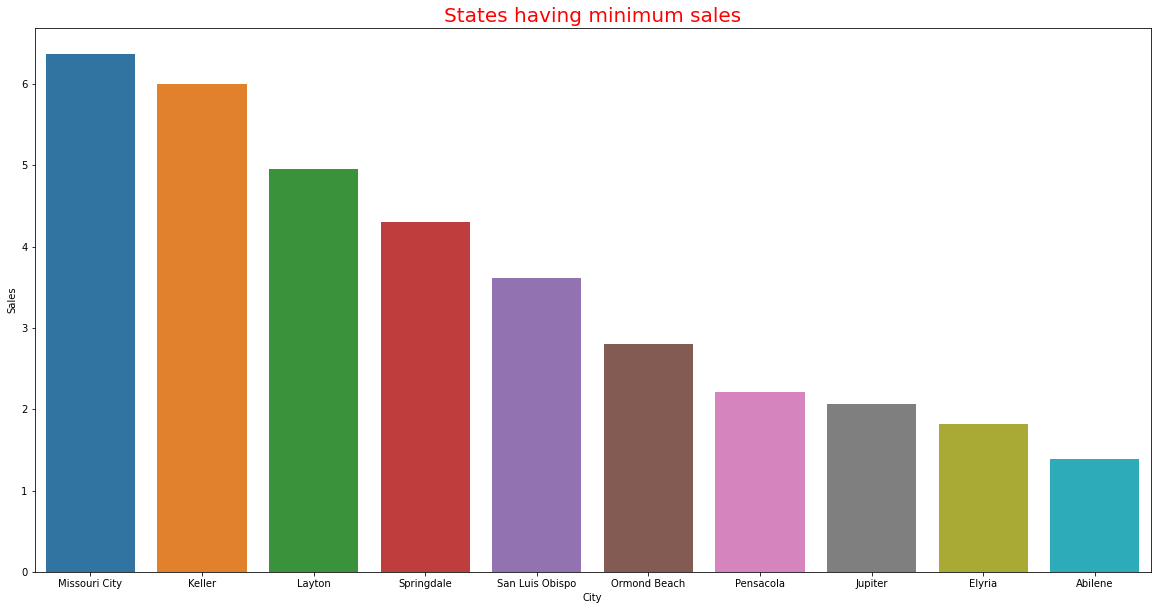

In [64]:
plt.figure(figsize=(20,10))
sb.barplot(x='City',y='Sales',data=city_sales.tail(10))
plt.title('States having minimum sales',color='r',size=20)
plt.show()

## Checking Sales Vs Profit in States.

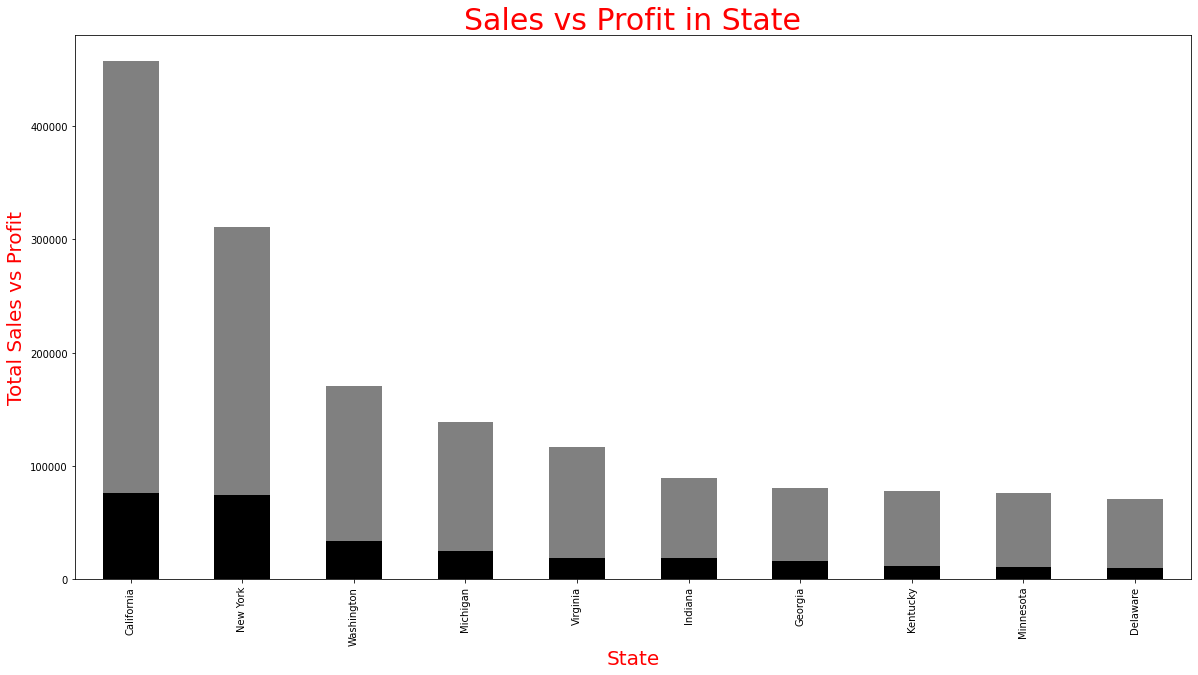

In [71]:
sales = df.groupby('State').sum()['Sales'].nlargest(n=10) #top 10 state with highest sales.
profit = df.groupby('State').sum()['Profit'].nlargest(n=10)
sales.plot(kind='bar',figsize=(20,10),color='gray')
profit.plot(kind='bar',figsize=(20,10),color='black')
plt.xlabel('State', size=20,color='r')
plt.ylabel('Total Sales vs Profit',size=20,color='r')
plt.title('Sales vs Profit in State',size=30,color='r')
plt.show()

## Checking Profit and Sales on different categories.

## 1. Checking total no. and types of categories.

In [73]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

## 2. Visualizing Sales on different types of categories.

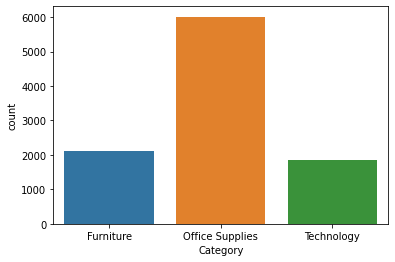

In [79]:
sb.countplot(x='Category',data=df)
plt.show()

## 2.Visualizing profit on different types of categories.

In [83]:
category_profit=df.groupby('Category').sum()['Profit'].sort_values(ascending=False)

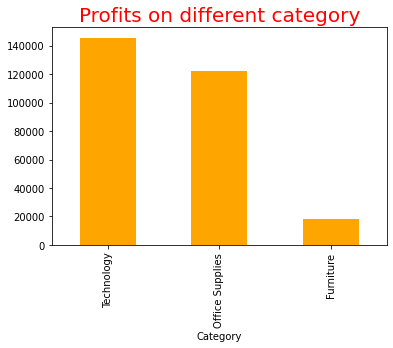

In [142]:
category_profit.plot(kind='bar',color='orange')
plt.title('Profits on different category',size=20,color='r')
plt.show()

## 3. Sales vs profit on different categories.

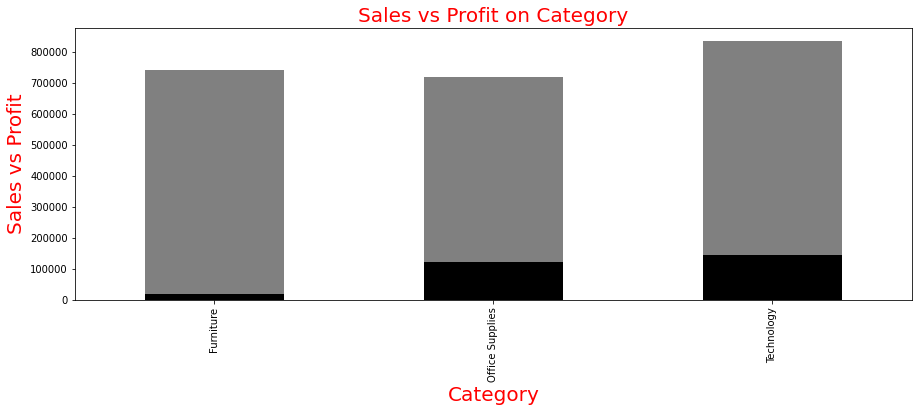

In [90]:
sales= df.groupby('Category').sum()['Sales']
profit = df.groupby('Category').sum()['Profit']
sales.plot(kind='bar',figsize=[15,5],color='Gray')
profit.plot(kind='bar',figsize=[15,5],color='black')
plt.title('Sales vs Profit on Category',size=20,color='r')
plt.xlabel('Category',size=20,color='r')
plt.ylabel('Sales vs Profit',size=20,color='r')
plt.show()


## Checking Profit on different sub-categories.

## 1. Checking total no. and types of categories.

In [92]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

## 2.Visualizing profit on different sub-categories.

In [94]:
profit_subcategory= df.groupby('Sub-Category').sum()['Profit'].sort_values(ascending=False)

<AxesSubplot:xlabel='Sub-Category'>

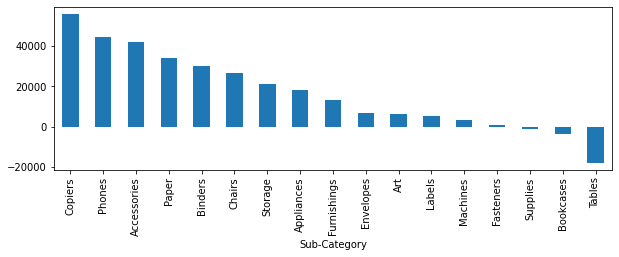

In [103]:
profit_subcategory.plot(kind='bar',figsize=[10,3])

## 3.Visualizing sales on different sub-category.

In [99]:
sales_subcategory= df.groupby('Sub-Category').sum()['Profit'].sort_values(ascending=False)

<AxesSubplot:xlabel='Sub-Category'>

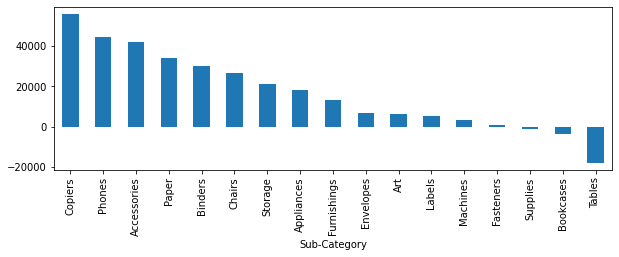

In [102]:
sales_subcategory.plot(kind='bar',figsize=[10,3])

## 4.Sales Vs Profit on different sub-category.

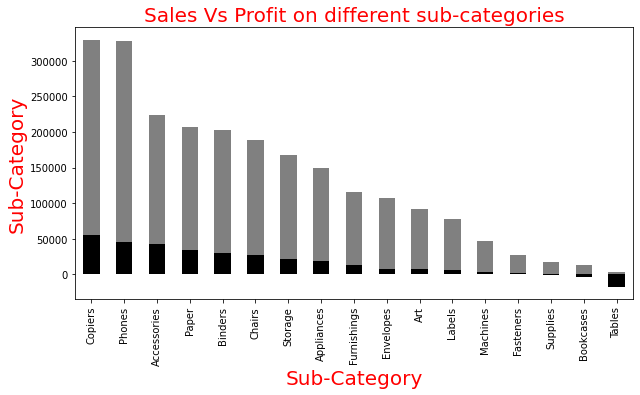

In [107]:
sales=df.groupby('Sub-Category').sum()['Sales'].sort_values(ascending=False)
profit=df.groupby('Sub-Category').sum()['Profit'].sort_values(ascending=False)
sales.plot(kind='bar',figsize=[10,5],color='gray')
profit.plot(kind='bar',figsize=[10,5],color='black')
plt.title('Sales Vs Profit on different sub-categories',size=20,color='r')
plt.xlabel('Sub-Category',size=20,color='r')
plt.ylabel('Sub-Category',size=20,color='r')
plt.show()

## Checking Profits on different ship-mode.

## 1. Checking total no. and types of ship mode.

In [110]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

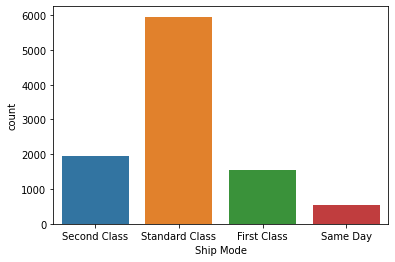

In [112]:
sb.countplot(x='Ship Mode',data=df)
plt.show()

## 2.Visualizing profit on different types of ship mode.

In [113]:
shipmode_profit = df.groupby('Ship Mode').sum()['Profit'].sort_values(ascending=False).reset_index()

In [ ]:
plt.figure(figsize=[30,15])
shipmode_profit.plot(kind='bar',x='Ship Mode',y='Profit',color='green')
plt.title('Profits on different ship-modes',size=20,color='r')
plt.show()

## 3. Visualizing of discounts on different ship modes.

In [125]:
shipmode_dis = df.groupby('Ship Mode').sum()['Discount'].sort_values(ascending=False).reset_index()

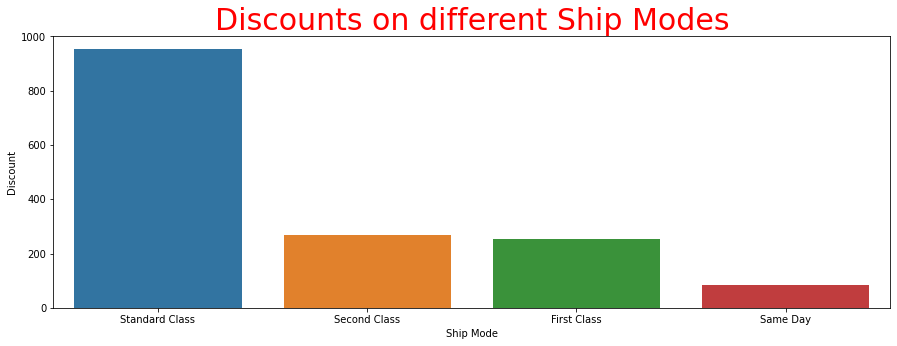

In [135]:
plt.figure(figsize=[15,5])
sb.barplot(x='Ship Mode',y='Discount',data=shipmode_dis)
plt.title('Discounts on different Ship Modes',size=30,color='r')
plt.show()


## Checking profits on different segments.

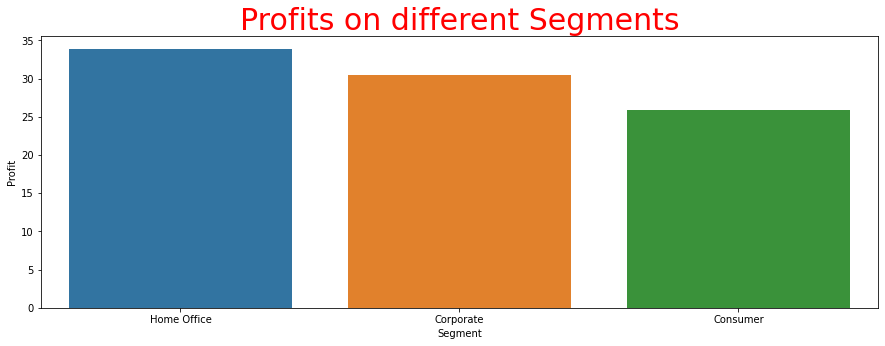

In [137]:
segment_profit = df.groupby('Segment').mean()['Profit'].sort_values(ascending=False).reset_index()
plt.figure(figsize=[15,5])
sb.barplot(x='Segment',y='Profit',data=segment_profit)
plt.title('Profits on different Segments',size=30,color='r')
plt.show()

## Sales vs Profit on different segments.

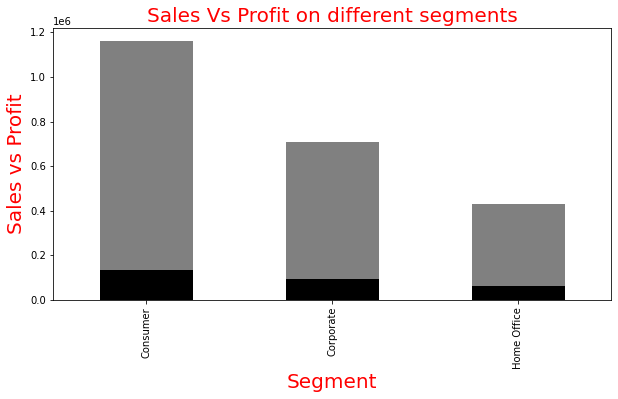

In [138]:
sales=df.groupby('Segment').sum()['Sales'].sort_values(ascending=False)
profit=df.groupby('Segment').sum()['Profit'].sort_values(ascending=False)
sales.plot(kind='bar',figsize=[10,5],color='gray')
profit.plot(kind='bar',figsize=[10,5],color='black')
plt.title('Sales Vs Profit on different segments',size=20,color='r')
plt.xlabel('Segment',size=20,color='r')
plt.ylabel('Sales vs Profit',size=20,color='r')
plt.show()

## Checking Profits on different regions.

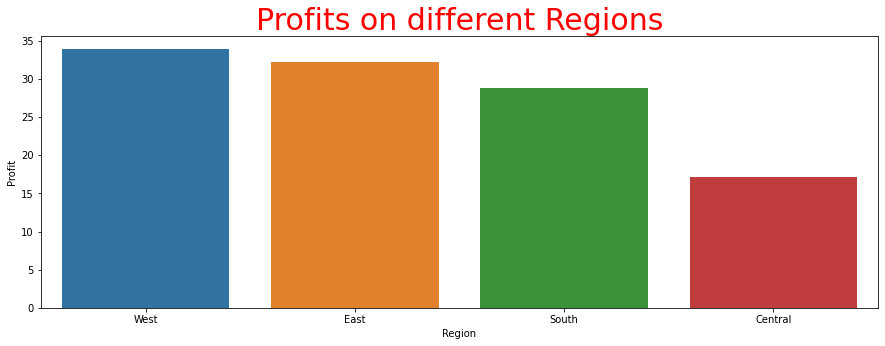

In [139]:
region_profit = df.groupby('Region').mean()['Profit'].sort_values(ascending=False).reset_index()
plt.figure(figsize=[15,5])
sb.barplot(x='Region',y='Profit',data=region_profit)
plt.title('Profits on different Regions',size=30,color='r')
plt.show()

## Sales vs Profit on different regions.

In [ ]:
sales=df.groupby('Region').sum()['Sales'].sort_values(ascending=False)
profit=df.groupby('Region').sum()['Profit'].sort_values(ascending=False)
sales.plot(kind='bar',figsize=[10,5],color='gray')
profit.plot(kind='bar',figsize=[10,5],color='black')
plt.title('Sales Vs Profit on different regions',size=20,color='r')
plt.xlabel('Region',size=20,color='r')
plt.ylabel('Sales vs Profit',size=20,color='r')
plt.show()

## Conclusion

## 1. Technology category has highest profit but has lowest supply.So in order to gain more profit we can increase the supply. 
## 2. Furniture has least profit but its supply is in excess so it won't affect the profit if we reduce the supply.
## 3. First class mode of shipping gets highest profit but supply through this mode  is low. So if we increase the supply through the first class mode we can get more profit.
## 4. Also we should reduce the supply through standard class mode of shipping as it gives least profit.
## 5. We are supplying more to consumer segment but it is giving us least profit , instead we should supply more to home office segment as it is giving us maximum profit.
## 6. Central region is getting least profit so we should try to increase the sales to get more profit.